# 9. Recent Monetary History

The context of contemporary monetary policy was profoundly shaped by the inflationary chaos that followed the end of the Bretton Woods system. Starting in the late 1960s, inflation grew higher and more volatile.

During the presidency of Lyndon B. Johnson, the general sentiment among macroeconomists was that inflation was not typically caused by monnetary forces. Keynes and the Keynesians who followed after asserted that the macroeconomy generally performed suboptimally. Inflationary policy was considered the price to be paid for promoting higher rates of growth and greater rates of employment. From the modern context, we can recognize that this view was naive as it implied that inflation expectations do not reliably update amongst labor and investors. In the period that followed, economists and policy makers learned not only do inflation expectations update, without a reliable guide for expectations of future inflation, an inflationary policy will tend to generate instability in inflation expectations. The problems generated from inflationary policy shaped macroeconomic theory and policy in the decades that followed. 

## The Role of Monetary Policy

In the early days of rising inflation, long before inflation reached its highest and most volatile point, Milton Friedman warned in his 1968 presidential address to the American Economic Association that monetary policy needed to follow simple, predictable principles that minimized economic distortions and promoted macroeconomic stability. Only a few year earlier, he and his coauthor, Anna J. Schwartz hed published *A Monetary History of the United States*. Their work documented the significance of the quantity theory in explaining macroeconomic fluctuations. In particular, the authors focused on the quantity of money defined by $M_1$ and $M_2$. That is, fluctuations in the extent of lending, reflected by changes in deposit accounts covered by these monetary aggregates, are associated with simultaneously fluctuations in the same direction. Increases in the quantity of money were associatd with changes in the level of expenditures. Business cycles were typically described by a contraction of credit. Periods of widespread inflation were typically associated with credit expansion. These contractions have often been the result of relatively tight or loose monetary policy, respectively.

The central bank, whatever its form, is an institution that naturally has a relationship with the national government. In the U.S., the Federal Reserve began cooperating with the U.S. Treasury during the Great Depression, at which time it ceased implementing monetary policy through private lending and purchases of private debt on the open market. During the Great Depression, the Federal Reserve began to implement monetary policy through the purchase and sale U.S. Treasuries - i.e., federal debt. The Great Depression was a period of significant fiscal expansion that set the precedent for future cooperation between the Fed and the U.S. Treasury. With the start of World War II, the U.S. Treasury explicitly requested that the Federal Reserve cooperate to maintain low rates on U.S. Treasuries. By the end of the 1940s, it was becoming clear that this relationship we problematic. While it may seem obvious to us that the Federal Reserve's expansions of the monetary base in that facilitated expansionary fiscal policy was to blame, it seems that the lesson was peceived by Keynesians only to apply to fiscal policy, or at least the combination of fiscal and monetary expansion. Keynesian held to the belief that monetary expansion, on its own, was not responsible for price level inflation.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
fedData = pd.read_csv("fedData.csv", index_col="Date", parse_dates=True)#, infer_datetime_format=True)
fedData.rename(columns={col: col.replace(" ($ Mil)","") for col in fedData.keys()}, inplace = True)
fedData[:"1936"].head()

,Gold at Fed (mil),High Powered Money (mil) (Friedman Schwartz),High Powered Money Less Gold (mil),Total,Gold Multiplier (Base),Gold Multiplier (M1),Bills Discounted,Bills Bought,U.S. Government Securities,All Other,Comm Paper,NYFRB Discount Window,Price Level (1913=100),Annualized Inflation,12 Month MA,Weighted Monthly Inflation,12 Month MA Weighted Inflation
Date,,,,,,,,,,,,,,,,,
1918-01-01,2873.0,5513.0,2640.0,1170,1.918900,6.297250,612.0,266.0,149.0,143.0,5.57,4.25,144.0,0.125000,NaN,NaN,NaN
1918-02-01,2875.0,5708.0,2833.0,1143,1.985391,6.193043,529.0,288.0,185.0,141.0,5.68,4.25,146.0,0.123077,NaN,0.166667,NaN
1918-03-01,2878.0,5813.0,2935.0,1263,2.019805,6.410007,537.0,315.0,271.0,140.0,5.88,4.25,147.0,0.113636,NaN,0.082192,NaN
1918-04-01,2879.0,5892.0,3013.0,1381,2.046544,6.434873,751.0,313.0,173.0,144.0,5.91,4.51,149.0,0.095588,NaN,0.163265,NaN
1918-05-01,2885.0,5855.0,2970.0,1412,2.029463,6.211785,897.0,278.0,86.0,151.0,5.88,4.56,151.0,0.086331,NaN,0.161074,NaN


In [2]:
import pandas_datareader.data as web
import datetime
def gather_data(data_codes, start, end = datetime.datetime.today(), freq = "A"):
    i = 0
    # dct.items() calls key and value that key points to
    for key, val in data_codes.items():
        if i == 0:
            # Create dataframe for first variable, then rename column
            df = web.DataReader(val, "fred", start, end).resample(freq).mean()
            df.rename(columns = {val:key}, inplace = True) 
            i = None
        else:
            # If dataframe already exists, add new column
            df[key] = web.DataReader(val, "fred", start, end).resample(freq).mean()
    return df
GD_dict = {"$CPI^{-1}$": "CUUR0000SA0R",
            "Federal Surplus": "FYFSD",
           "GDP":"FYGDP"
}

In [3]:

diff = 12
freq = "M"
start = datetime.datetime(1913, 1, 1)
# end = datetime.datetime(2019, 12, 31)
end =datetime.datetime.today()
GD_data = gather_data(GD_dict, start, 
          end = end, freq = freq)
GD_data["CPI"] = GD_data["$CPI^{-1}$"].pow(-1)
GD_data["CPI"] = GD_data["CPI"].div(GD_data["CPI"].iloc[0])
GD_data["GDP"] = GD_data["GDP"].interpolate(method='polynomial', order=3).mul(1000)
GD_data["Federal Surplus"] = GD_data["Federal Surplus"].interpolate(method='polynomial', order=3)   
GD_data["$\\frac{Surplus}{GDP}$"] =  GD_data["Federal Surplus"].div(GD_data["GDP"])
GD_data.dropna().head()

,$CPI^{-1}$,Federal Surplus,GDP,CPI,$\frac{Surplus}{GDP}$
DATE,,,,,
1930-06-30,593.8,738.000000,98400.000000,1.714045,0.007500
1930-07-31,602.1,705.215088,97537.934568,1.690417,0.007230
1930-08-31,605.7,662.181893,96606.216298,1.680370,0.006854
1930-09-30,602.1,610.031886,95642.647170,1.690417,0.006378
1930-10-31,605.7,544.516244,94587.548820,1.680370,0.005757


['Bills Discounted', 'Bills Bought', 'U.S. Government Securities', 'All Other']


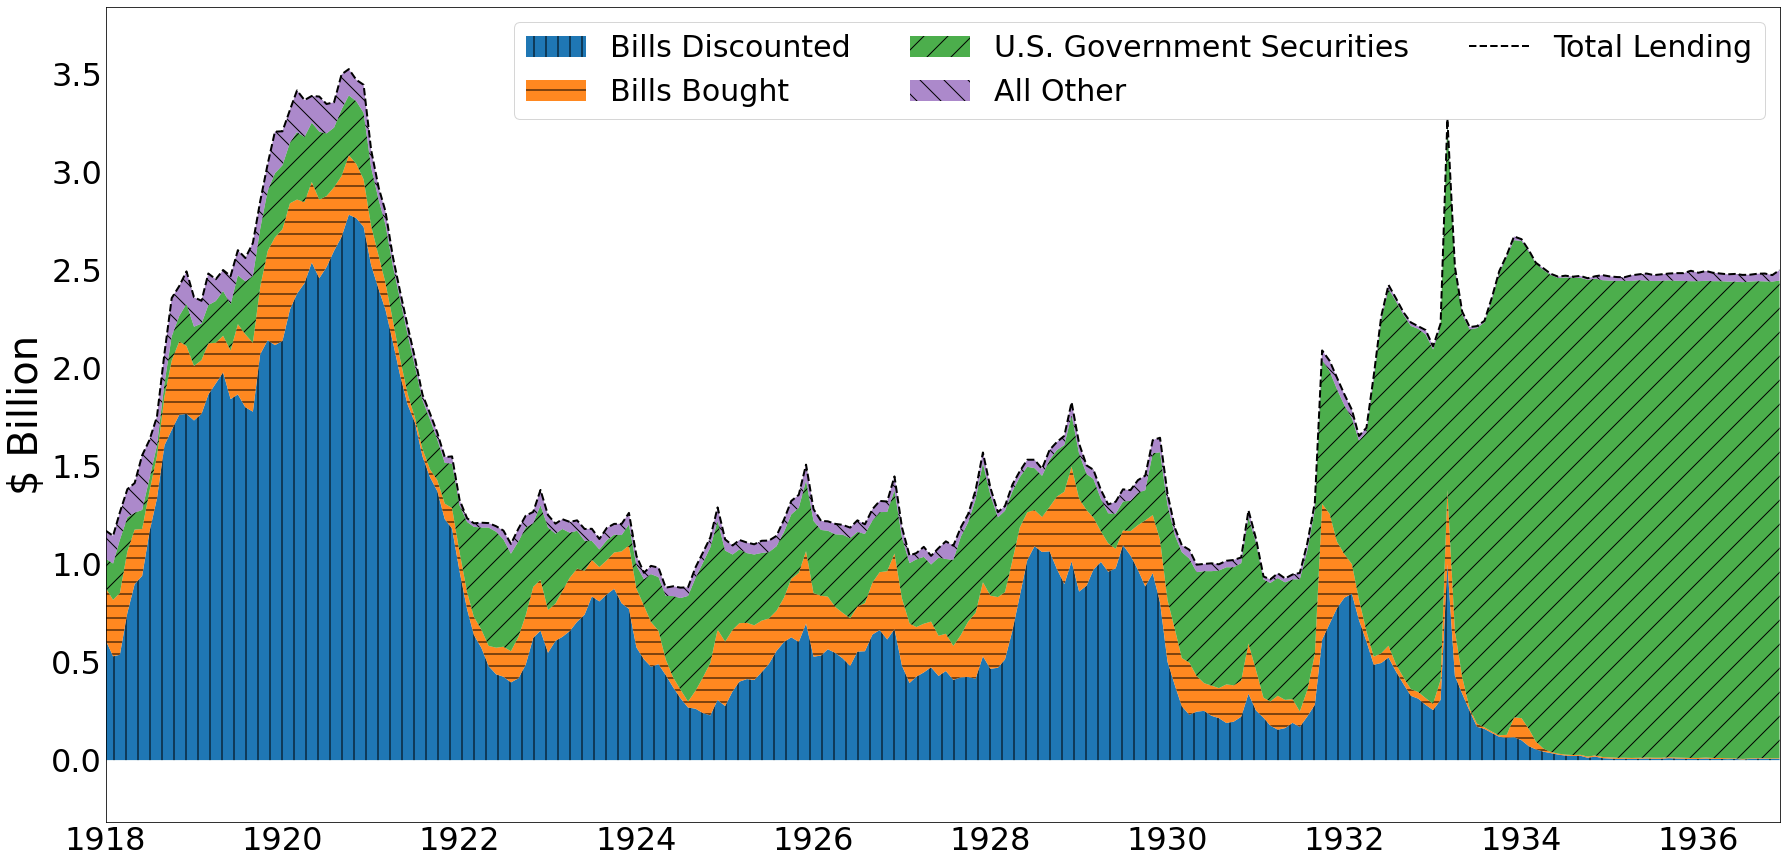

In [4]:
def stack_hatch(df, total_var = None, ylabel = "$ Trillion", 
                hatches = ['|', '-', '/', '\\', '+',  'O', '.', '*'], 
                loc = "upper left",
                colors = ["C0", "C1", "C2", "C4", "C5", "C6", "C7","C8", "C9"],
                ncol = 2):
    keys = list(df.keys())
    keys.remove(total_var)
    print(keys)
    fig, ax = plt.subplots(figsize = (30,15))
    for i in range(len(keys)):
        key = keys[i]
        if i > 0:
            for j in range(i):
                if j == 0:
                    base = df[keys[j]] 
                else:
                    base = base.add(df[keys[j]])
            ax.fill_between(df.index, base, df[key].add(base),
                            facecolor = colors[i],
                            hatch=hatches[i], 
                            alpha = 1 - i * .075, 
                            label = key)
            
        else:
            ax.fill_between(df.index, [0] * len(df.index), df[key],facecolor = colors[i],
                                             hatch=hatches[i], label = key)
            
    if total_var != None:
        ax.plot(df[total_var], label = total_var, linewidth = 2, linestyle = "--",  color = "k")
    ax.legend(loc = loc, ncol = ncol, fontsize = 30)
    ax.set_ylabel(ylabel, fontsize = 40)
    ax.tick_params('both', length=0, which='both')
    
plt.rcParams['axes.ymargin'] = 0.09
plt.rcParams['axes.xmargin'] = 0
plt.rcParams.update({"font.size":32})

plot_vars = ["Bills Discounted", "Bills Bought", "U.S. Government Securities", "All Other"]
plot_data = fedData[plot_vars].dropna().div(1000)
plot_data["Total Lending"] = plot_data.sum(axis = 1)
total_var = "Total Lending"

stack_hatch(plot_data[plot_vars + [total_var]], total_var, ylabel = "$ Billion", loc = "upper right",ncol = 3)

In [5]:
data_dict = {"$P_{CPI}$":"CPIAUCSL",
             "Federal Debt": "GFDEBTN",
#     "Y":"GDP",
#              "y":"GDPC1",
#              "G":"FGEXPND",
#              "$\\tau$":"FGRECPT",
             "$M_1$":"M1SL",
#              "$\\frac{G}{P}$":"GCEC1",
#              "$\\frac{G_C}{P}$":"A955RX1Q020SBEA",

#              "$\\frac{I_{Private}}{P}$":"GPDIC1",
             "Total Base": "BOGMBASE",
#              "C":"WCURCIR",
             "Reserves at Fed":"RESBALNS"}

rates_dict ={"$r_{3M}$":"TB3MS",
             "$r_{1}$": "DGS1",
             "$r_{10}$": "DGS10",
             "$r_{30}$": "DGS30",
             "$r_{Euro-Dollar}$":"IR3TED01USM156N",
             "Unemployment Rate":"UNRATE"}

diff = 12
freq = "M"
start = datetime.datetime(1950, 1, 1)
# end = datetime.datetime(2019, 12, 31)
end =datetime.datetime.today()
data = {}
data["Level"] = gather_data(data_dict, start, 
          end = end, freq = freq)
data["Level"]["C"] = data["Level"]["Total Base"].div(1000).sub(data["Level"]["Reserves at Fed"])
data["Level"]["$\\frac{C}{P}$"] = data["Level"]["C"].div(data["Level"]["$P_{CPI}$"])
data["Level"]["$\\frac{M_1}{P}$"] = data["Level"]["$M_1$"].div(data["Level"]["$P_{CPI}$"])
for y in ["Federal Debt"]:#"Y", "y", "G", "$\\tau$",  "$\\frac{I_{Private}}{P}$", "Federal Debt"]:
    # fill in missing monthly observations since data is quarterly
    data["Level"][y] = data["Level"][y].interpolate(method='polynomial', order=3)  

# data["Level"]["$\\frac{G-\\tau}{Y}$"] = data["Level"]["$G-\\tau$"].div(data["Level"]["Y"])


rates =  gather_data(rates_dict, start, 
          end = end, freq = freq)
for key in rates:
    rates[key] = rates[key].div(100)
rates["Euro-Dollar Spread"] =rates["$r_{Euro-Dollar}$"].sub(rates["$r_{3M}$"])
    


C:\Users\JLCat\AppData\Local\Temp\ipykernel_22336\2087673001.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(round(y,2) * 100) + "%" for y in ax.get_yticks()])


[Text(0, -0.1, '-10.0%'),
 Text(0, -0.05, '-5.0%'),
 Text(0, 0.0, '0.0%'),
 Text(0, 0.05000000000000002, '5.0%'),
 Text(0, 0.1, '10.0%'),
 Text(0, 0.15, '15.0%'),
 Text(0, 0.20000000000000004, '20.0%'),
 Text(0, 0.25, '25.0%')]

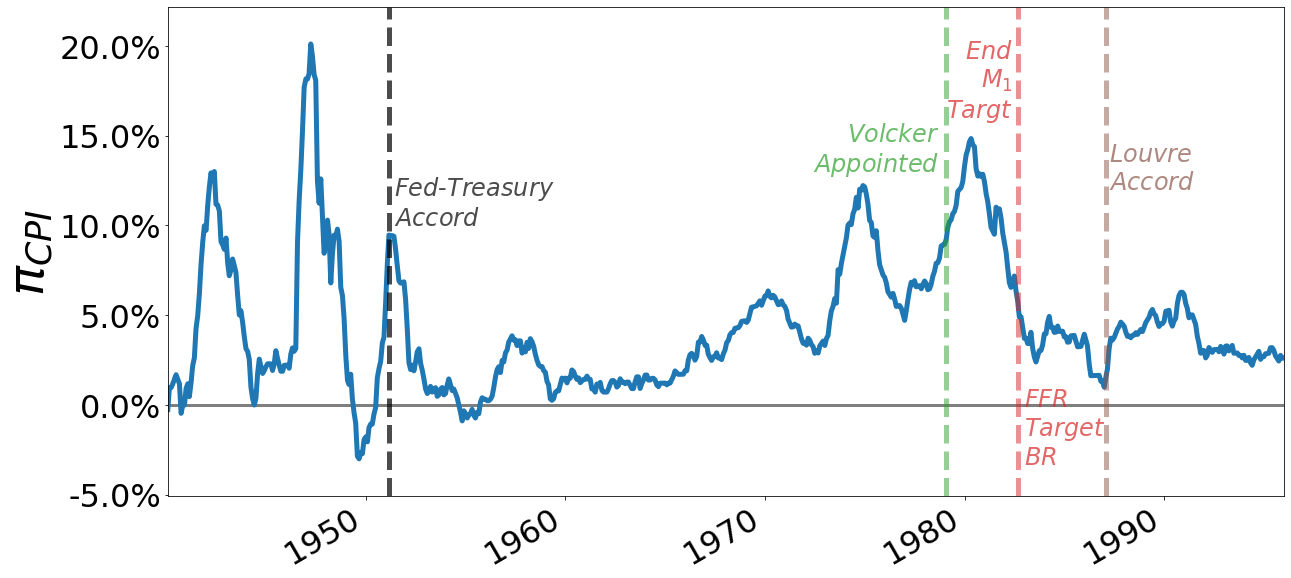

In [6]:
fig, ax = plt.subplots(figsize=(20,10))
ax.axhline(0, linewidth = 3, ls = "-", color = "k", alpha = .5)
GD_data["CPI"].pct_change(diff).loc["1940":"1995"].dropna().plot.line(linewidth = 5, ax = ax)
ax.axvline("1951-03", ls = "--", color = "k", alpha = .7, linewidth = 5)
ax.axvline("1979-02", linewidth = 5, ls = "--", color = "C2", alpha = .5)
ax.axvline("1982-09", linewidth = 5, ls = "--", color = "C3", alpha = .5)
ax.axvline("1987-02", linewidth = 5, ls = "--", color = "C5", alpha = .5)
ax.text("1951-06", .1, "$Fed$-$Treasury$\n$Accord$", ha = "left", alpha = .7, fontsize = 24)
ax.text("1978-10", .13, "$Volcker$\n$Appointed$", ha = "right", color = "C2", alpha = .7, fontsize = 24)
ax.text("1982-06", .16, "$End$\n$M_1$\n$Targt$", ha = "right", color = "C3", alpha = .7, fontsize = 24)
ax.text("1983", .01, "$FFR$\n$Target$ \n$BR$", ha = "left", va = "top", color = "C3", alpha = .7, fontsize = 24)
ax.text("1987-04", .12, "$Louvre$\n$Accord$", alpha = .7,color = "C5", fontsize = 24)
ax.set_ylabel("$\\pi_{CPI}$", fontsize = 50)
ax.set_xlabel("")
ax.set_yticklabels([str(round(y,2) * 100) + "%" for y in ax.get_yticks()])

C:\Users\JLCat\AppData\Local\Temp\ipykernel_22336\1507222209.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(round(y,2) * 100) + "%" for y in ax.get_yticks()])


[Text(0, -0.4, '-40.0%'),
 Text(0, -0.30000000000000004, '-30.0%'),
 Text(0, -0.2, '-20.0%'),
 Text(0, -0.09999999999999998, '-10.0%'),
 Text(0, 0.0, '0.0%'),
 Text(0, 0.09999999999999998, '10.0%'),
 Text(0, 0.20000000000000007, '20.0%'),
 Text(0, 0.30000000000000004, '30.0%')]

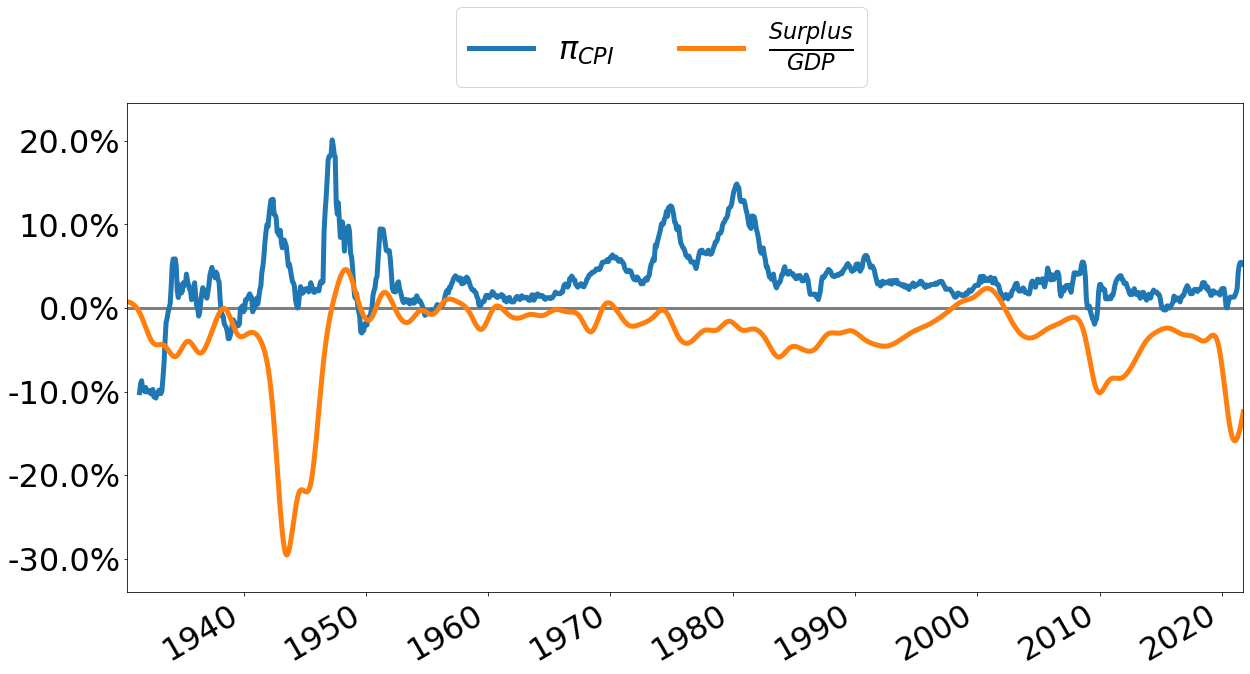

In [7]:
fig, ax = plt.subplots(figsize=(20,10))
ax.axhline(0, linewidth = 3, ls = "-", color = "k", alpha = .5)
plot_data = GD_data[["CPI","$\\frac{Surplus}{GDP}$"]].dropna()
plot_data["CPI"].pct_change(diff).dropna().plot.line(linewidth = 5, label = "$\pi_{CPI}$", ax = ax)
plot_data["$\\frac{Surplus}{GDP}$"].dropna().plot.line(linewidth = 5, ax = ax)
ax.legend(bbox_to_anchor = (.28,1), ncol = 2)
ax.set_xlabel("")
ax.set_yticklabels([str(round(y,2) * 100) + "%" for y in ax.get_yticks()])

Whatever the interpretation, the [Fed-Treasury Accords](https://www.federalreservehistory.org/essays/treasury-fed-accord) seem to have stabilized inflation for more than a decade. However, monetary restraint began to fall by the wayside in the 1960s as the Phillips Curve was popularized as a justification of expansionary monetary policy. High inflation was viewed as a necessary evil that enabled the rate of unemployment to remain persistently low. As we have already learned, this belief would be relegated to the dustbin of history as inflation expectations destabilized. The political conversation at the time asserted the need for spending on the war in Vietnam, but sentiment reflected by Lyndon B. Johnson was that there was no choice to be made between guns or butter. 

It is a wonder that Friedman so accurately predicted the problems that would be associated with monetary expansion in that would continue for greater than a decade after his speech. During the 1970s, members of the Federal Reserve would tend to be skeptical of monetary theories of inflation, instead emphasizing supply-side factors, including the idea that high input prices were driving rises in the price level. To the extent that monetary policy was believed to be effective in constraining policy, the Burns led Federal Reserve did not want to stunt economic growth by slowing the rate of monetary expansion. As we can see from CPI data, inflation followed a volatile, upward trend during the 1970s.

In [8]:
data["Log"] = np.log(data["Level"])
data["Rates"] = data["Log"].diff(diff)

for rate in rates:
    data["Rates"][rate] = rates[rate]
    data["Log"][rate] = rates[rate]
data["Rates"].rename(columns = {"$P_{CPI}$":"$\pi_{CPI}$"}, inplace = True)
data["Rates"]

,$\pi_{CPI}$,Federal Debt,$M_1$,Total Base,Reserves at Fed,C,$\frac{C}{P}$,$\frac{M_1}{P}$,$r_{3M}$,$r_{1}$,$r_{10}$,$r_{30}$,$r_{Euro-Dollar}$,Unemployment Rate,Euro-Dollar Spread
DATE,,,,,,,,,,,,,,,
1950-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0107,NaN,NaN,NaN,NaN,0.065,NaN
1950-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0112,NaN,NaN,NaN,NaN,0.064,NaN
1950-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0112,NaN,NaN,NaN,NaN,0.063,NaN
1950-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0115,NaN,NaN,NaN,NaN,0.058,NaN
1950-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0116,NaN,NaN,NaN,NaN,0.055,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-31,0.081731,NaN,0.068625,-0.077471,NaN,NaN,NaN,-0.013106,0.0098,0.020595,0.028981,0.030657,NaN,0.036,NaN
2022-06-30,0.086134,NaN,0.062072,-0.090320,NaN,NaN,NaN,-0.024062,0.0149,0.026514,0.031433,0.032457,NaN,0.036,NaN
2022-07-31,0.081415,NaN,0.052015,-0.101738,NaN,NaN,NaN,-0.029401,0.0223,0.030195,0.028960,0.031025,NaN,0.035,NaN


Text(0, 0.5, '$\\pi_{CPI}$')

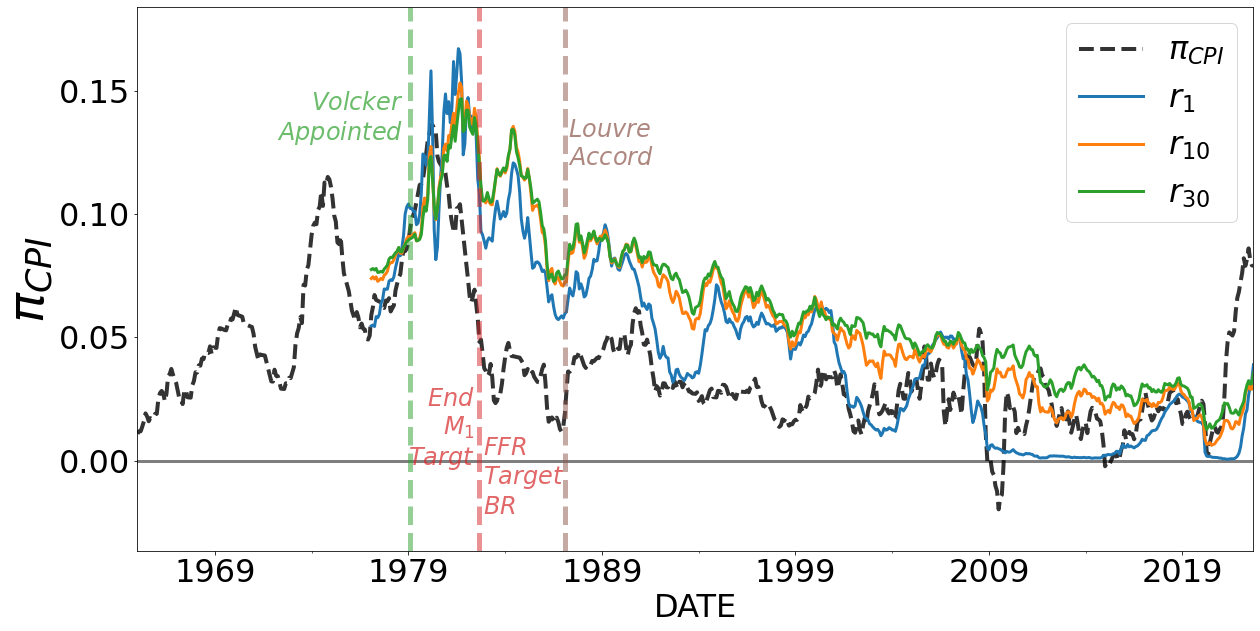

In [9]:
fig,ax = plt.subplots(figsize=(20,10))
plot_vars = ["$r_{1}$","$r_{10}$", "$r_{30}$", "$\pi_{CPI}$"]
data["Rates"][plot_vars[-1]].loc["1965":].dropna().plot.line(linewidth = 4, ls = "--",
                                                             color = "k", alpha = .8, 
                                                             ax = ax)

ax.axhline(0, linewidth = 3, ls = "-", color = "k", alpha = .5)
data["Rates"][plot_vars[:-1]].dropna().plot.line(linewidth = 3,legend = False, ax = ax)
ax.legend()
ax.axvline("1979-02", linewidth = 5, ls = "--", color = "C2", alpha = .5)
ax.axvline("1982-09", linewidth = 5, ls = "--", color = "C3", alpha = .5)
ax.axvline("1987-02", linewidth = 5, ls = "--", color = "C5", alpha = .5)
ax.text("1978-10", .13, "$Volcker$\n$Appointed$", ha = "right", color = "C2", alpha = .7, fontsize = 24)
ax.text("1982-06", .03, "$End$\n$M_1$\n$Targt$", ha = "right", va = "top",color = "C3", alpha = .7, fontsize = 24)
ax.text("1982-11", .01, "$FFR$\n$Target$ \n$BR$", ha = "left", va = "top", color = "C3", alpha = .7, fontsize = 24)
ax.text("1987-04", .12, "$Louvre$\n$Accord$", alpha = .7,color = "C5", fontsize = 24)
ax.set_ylabel("$\\pi_{CPI}$", fontsize = 50)

#### Fisher Effect, Unemployment, and Expectations

If the only effect of inflation was that prices tend to rise, the problems generated by inflation would be relatively limited. Many don't realize that interest rates on bonds include an inflation component. This, of course, is reflected in the Fisher equation, which we have seen already on multiple occasions:

$$i = \rho_e + \pi_e$$

While unexpected inflation might boost productivity for a short-while, as investors update their inflation expectations, they demand higher rates of return to compensate for expected devaluation. This creates a strong tendancy for interest rates to follow the rate of inflation. Further, if inflation expectations become unanchored, it may take quite a while for interest rates to fall. This is especially true for long-term debts. That is, the rate of interest has an **inflation risk** [component](https://www.clevelandfed.org/indicators-and-data/inflation-expectations#background). The inflation expectations measures provided by the Federal Reserve Bank of Cleveland also include an estimate of such inflation risk. However, the unresponsiveness of this term, especially during a period where inflation expectations were not well anchored merits skepticism. Inflation risk was obviously perceived as being higher during the early 1980s than it was during the early 2000s, yet, this measure shows no meaningful change across the period.
   
### Monetary Policy and Instability   
   
So long as inflation expectations are not updated, monetary expansion can readily translate to a postively impacted short-run component. However, as inflation expectations become unanchored, financial markets increasingly and rapidly approximate long-run outcomes. The cyclcal component of $y$ become increasingly insensitive to changes in $M$, though volatility in $y$ may mirror volatility in inflation expectations. We saw this in our presentation of Lucas (1971). Countries with relatively low inflation were able to capture some short-run gains from positive aggregate demand shocks, where as countries with high and volatile inflation tended not to benefit from these positive aggregate demand shocks. Monetary expansion very quickly reaches the point of diminishing marginal returns. 

Once inflation expectations grow high and unanchored, monetary policy becomes a liability for economic stability. Thus, Friedman's first policy recommendation is that monetary policy not generate instability. In the least, monetary authorities can follow a monetary Hyppocratic Oath to "first do no harm". The trouble, as we have seen from the Fed-Treasury Accords as well as with inflationary instability in developing countries, is that monetary policy is seen as a source of seigniorage among policymakers. It is a convenient source of revenues that allow do not require congressional approval. Further, when inflation first became a problem, the graduate income tax schedule did not adjust for inflation, so income earners experienced *de facto* tax hikes!

As one should epect from the Fisher equation, high and volatile inflation generates high and volatile interest rates. Interest rates facilitate intertemporal plan formation. They provide critical information that allows entrepreneurial plans to dovetail across time. Volatile inflation diminishes the information content in interest rates, leading entrepreneurs to hedge for risk due to inflation *and* inflation volatility. Intertemporal plan formation become more costly or, in other words, less efficient. The ability of the competitive market process to produce value is inhibited. And, more obviously, individuals unable to hedge for economic instability are most greatly harmed.

                
#### Early Inflation and the Eurodollar Market

Inflation interacted with financial regulation in the United States to create other unexpected problems Regulation-Q. Regulation-Q limited the rate of interest that could be paid on savings deposit accounts and allowed no interest to be paid on demand deposits. As inflation rose to excessive levels, banks innovated around this problem. Some banks created [NOW accounts](https://en.wikipedia.org/wiki/Negotiable_order_of_withdrawal_account), which allowed for negotiable checks to be written against deposits but the accounts were not legally classified as demand deposit accounts. Since these were not demand depsoits, the NOW accounts could pay up to 5\% interest to deposit holders. A more formidable challenge, however, came in the form of the Eurodollar market. The interest rate ceiling savings accounts led to international capital flows amongst those seeking higher returns to compensate for high rates of inflation.

The Euro-dollar market preceded the inflation of the 1970s. If one deposits their dollars in a foreign account, the banks holding those dollars are not subject to U.S. financial regulations. As dollars flowed to Europe during the 1960s and 1970s, this meant that these foreign deposit accounts were not subject to regulation-Q. Thus, dollar deposits outside of the United States could earn higher rates of interest than if they were held at banks within the United States.

Two factors determine the incentive for investment in these accounts. On the one hand, it can be relatively costly for an American to deposit funds with a foreign bank. This cost would inhibit investment. On the other hand, an increase in rates paid on Euro-dollar deposits compared to rates paid on comparable American-dollar deposits would tend to draw funds as the discrepancy implies gain, particularly if this gain offset the cost that we have just considered. Firms began to engage in regulatory arbitrage. Meryll-Lynch had branches both in the U.S. and in Europe. As an international corporation, it could lend money to from American branches to European branches, thus reducing the cost of Euro-dollar investment for American depositors. Meryll-Lynch began offering Euro-dollar deposit accounts to the public in 1976. Around the same time that NOW deposit accounts became available in across New England.

This complex interaction began to effect monetary policy. Whereas monetary expansion is intend to impact domestic investment and consumption, the inflationary effect of monetary expansion made investment in the Euro-dollar market more attractive. 


C:\Users\JLCat\AppData\Local\Temp\ipykernel_22336\3129710019.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([str(round(i * 100,2)) + "%" for i in ax.get_xticks()])
C:\Users\JLCat\AppData\Local\Temp\ipykernel_22336\3129710019.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(round(i * 100,2)) + "%" for i in ax.get_yticks()])


,$M_1$,Euro-Dollar Spread,$\pi_{CPI}$
$M_1$,1.000000,-0.130092,-0.096746
Euro-Dollar Spread,-0.130092,1.000000,0.632838
$\pi_{CPI}$,-0.096746,0.632838,1.000000


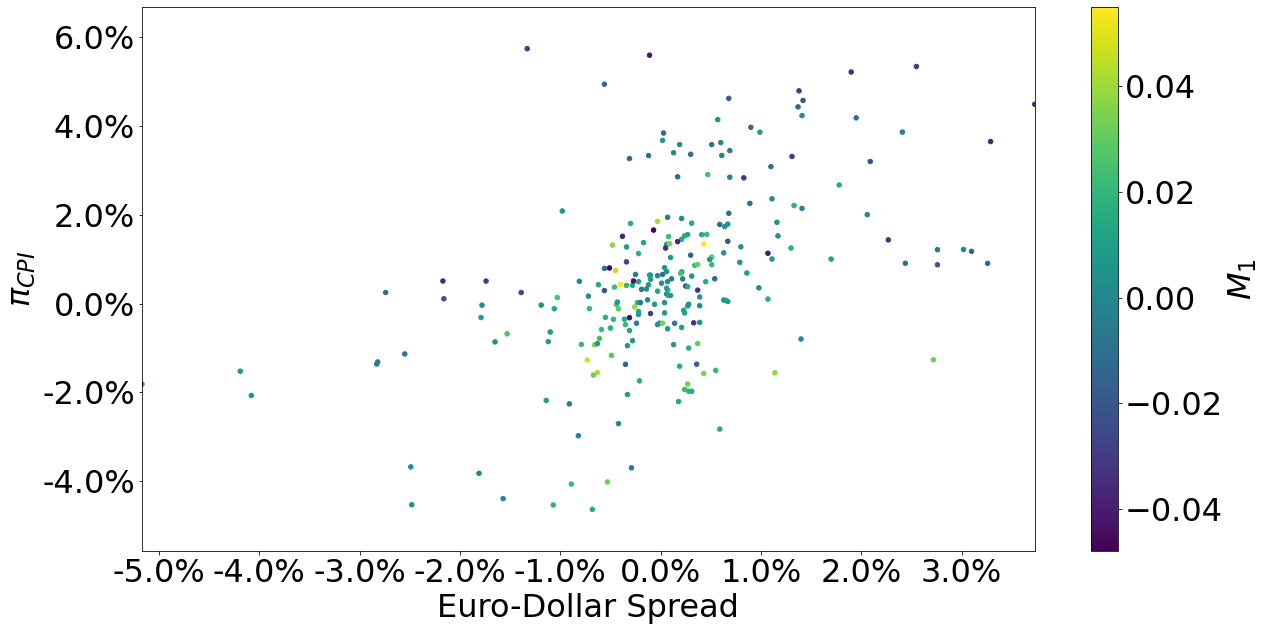

In [10]:
fig, ax = plt.subplots(figsize=(20,10))
plot_vars = ["$M_1$","Euro-Dollar Spread", "$\pi_{CPI}$"]
plot_data = data["Rates"][plot_vars]
plot_data.loc[:"1980"].diff(diff).dropna().plot.scatter(c = "$M_1$",x = "Euro-Dollar Spread",y ="$\pi_{CPI}$",
                                                        colormap = "viridis", ax = ax)
ax.set_xticklabels([str(round(i * 100,2)) + "%" for i in ax.get_xticks()])
ax.set_yticklabels([str(round(i * 100,2)) + "%" for i in ax.get_yticks()])
plot_data[plot_vars].corr()

C:\Users\JLCat\AppData\Local\Temp\ipykernel_22336\2097771533.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(round(i * 100,2)) + "%" for i in ax.get_yticks()], color = "C0")
C:\Users\JLCat\AppData\Local\Temp\ipykernel_22336\2097771533.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels([str(round(i * 100,2)) + "%" for i in ax2.get_yticks()], color = "C1")


Text(0, 0.5, 'Euro-Dollar Spread')

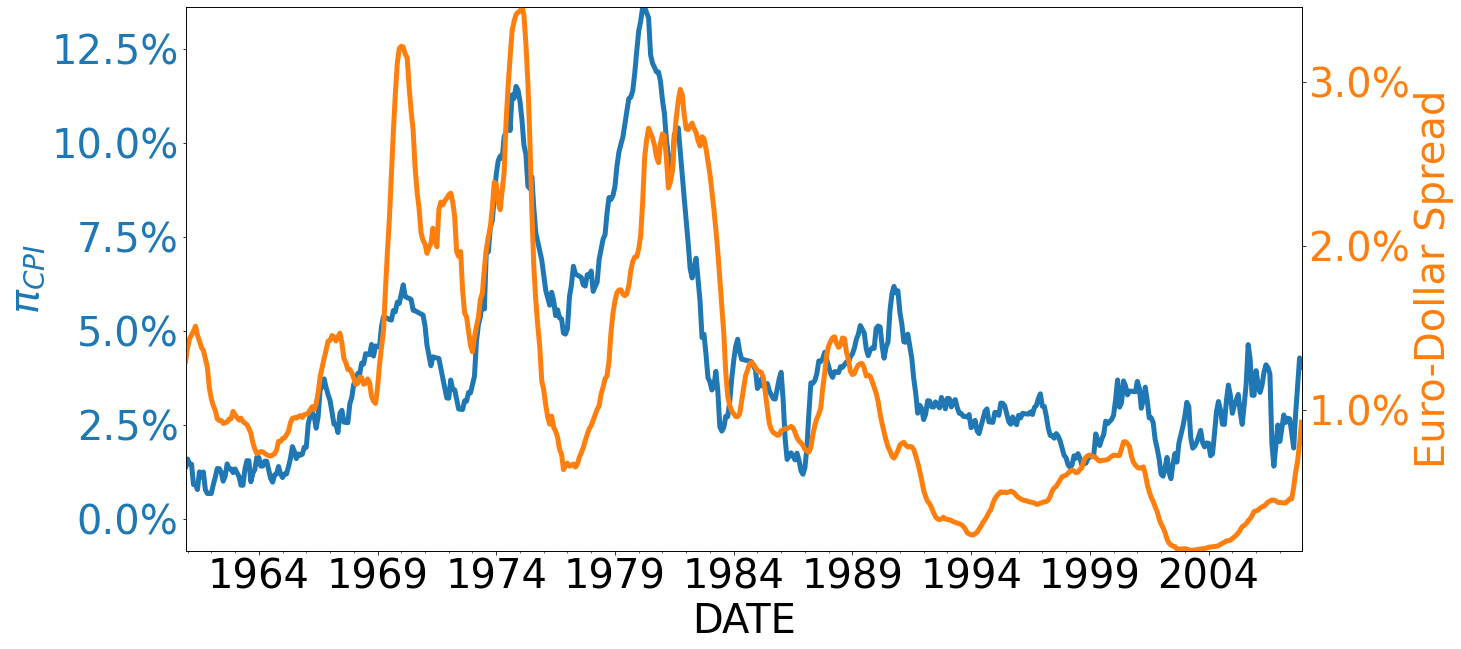

In [11]:
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] =0
plt.rcParams.update({"font.size" : 40})
plot_vars = ["$\pi_{CPI}$","Euro-Dollar Spread"]
plot_data = data["Rates"][plot_vars]
fig, ax = plt.subplots(figsize=(20,10))
ax2 = ax.twinx()
plot_data.loc[:"2007","$\pi_{CPI}$"].dropna().plot.line(linewidth = 5, ax = ax)
plot_data.loc[:"2007", "Euro-Dollar Spread"].rolling(12).mean().dropna().plot.line(linewidth = 5, color = "C1", ax = ax2)
ax.set_yticklabels([str(round(i * 100,2)) + "%" for i in ax.get_yticks()], color = "C0")                    
ax2.set_yticklabels([str(round(i * 100,2)) + "%" for i in ax2.get_yticks()], color = "C1") 
ax.set_ylabel(plot_vars[0], color = "C0")
ax2.set_ylabel(plot_vars[1], color = "C1")

C:\Users\JLCat\AppData\Local\Temp\ipykernel_22336\168679557.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(round(i * 100,2)) + "%" for i in ax.get_yticks()], color = "C0")
C:\Users\JLCat\AppData\Local\Temp\ipykernel_22336\168679557.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels([str(round(i * 100,2)) + "%" for i in ax2.get_yticks()], color = "C1")


Text(0.5, 1.0, '$\\sigma_{12 Months}$')

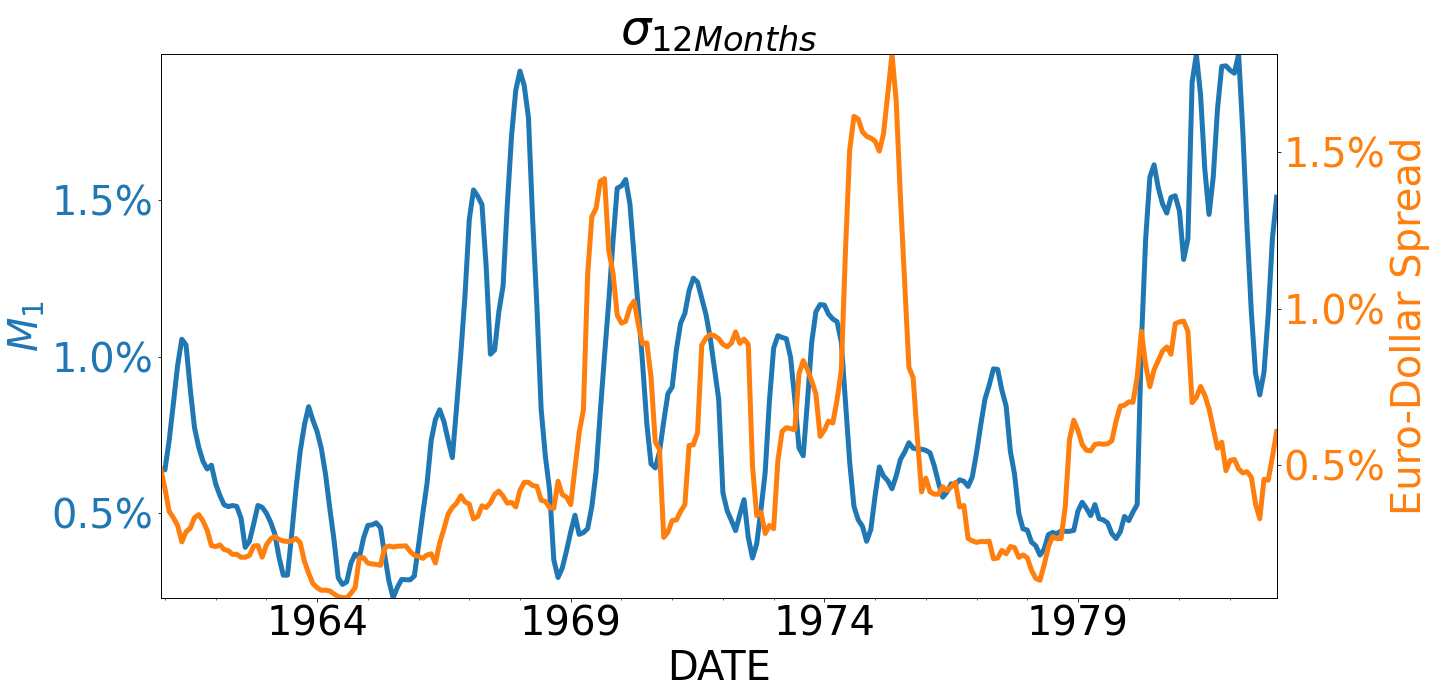

In [12]:
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] =0
plt.rcParams.update({"font.size" : 40})
plot_vars = ["$M_1$","Euro-Dollar Spread"]
plot_data = data["Rates"][plot_vars].rolling(diff).std()
fig, ax = plt.subplots(figsize=(20,10))
ax2 = ax.twinx()
plot_data.loc[:"1982","$M_1$"].dropna().plot.line(linewidth = 5, ax = ax)
plot_data.loc[:"1982", "Euro-Dollar Spread"].dropna().plot.line(linewidth = 5, color = "C1", ax = ax2)
ax.set_yticklabels([str(round(i * 100,2)) + "%" for i in ax.get_yticks()], color = "C0")                    
ax2.set_yticklabels([str(round(i * 100,2)) + "%" for i in ax2.get_yticks()], color = "C1") 
ax.set_ylabel(plot_vars[0], color = "C0")
ax2.set_ylabel(plot_vars[1], color = "C1")
ax.set_title("$\sigma_{12 Months}$")

### Predictable Monetary Policy: Monetary Rules and Macroeconomic Stability

Friedman's second prong was to promote macroeconomic stability. The best way that the central bank can accomplish this task is to stabilize expectations concerning monetary policy amongst consumers and investors. First, monetary policy must limit its scope. Consistent with the Fed-Treasury Accords, this means that monetary policy should not be employed as a tool of the U.S. Treasury. Likewise, monetary policy cannot be used to promote economic outcomes incosistent with long-run forces. Looking to the real-nominal identifies the difference between short-run and long-run forces, Friedman recognizes that persistent attempts to move either the interest rate or the rate of unemployment to values inconsistent with their long-run rates would lead to unstable inflation and financial volatility.
            
To accomplish the goal of promoting stable expectations with regard to infaltion and interest rates, Friedman suggests following a simple monetary rule. It is in this speech that he suggests that **k-percent** rule as an appropriate rule that would stabilize expectations. The stock of money should grow at some constant rate. So long as investors know that the rate would be constant, they could make plans around a stable, predictable growth path of money. As we have seen in previousl essons, over the long-run, the price level is a function the quantity of money since velocity is anchored by the interest rate. As we will see with the Volcker Fed, however, short-run fluctuations can be quite large, especially if inflation expectations are not anchored.

#### Unemployment and Accelerating Inflation

Friedman and otherw recognized that the best monetary policy could for promoting minimum unemployment was to target the efficient rate of unemployment. That is, monetary policy should minimize cyclical unemployment. Thus, Friedman did not oppose intervention, but rather, reserved his approval for periods of economic downtrun during which the cyclical rate of unemployment would rise above the natural rate. Yet, Friedman left no room activism in his formulation of ideal policy. It was stability in the growth path of money that would preven sharp downturns. 

Stability would also prevent the need to initiate disniflation that causes a high rate of unemployment when inflation is high. Friedman recognized that unemployment could only be temporarily lowered due to a rise in the rate of inflation. Thus, if one was serious about using inflationary policy to lower unemployment permanently below the natural rate, policy would require accelerating inflation that continually moved ahead of inflation expectations of labor. This, of course, is no way ideal. The same stability in monetary expansion that would improve the stability of employment outcomes was the same stabilty that would promote stable inflation and interest rates.

#### Pegging Rates and Prices

Friedman had observed that during the 1940s, the pegging of interest rates at arbitrarily low rates induced tremendous inflation. It was this policy stance and financial volatility that resulted that led to the Fed-Treasury Accord. This was of course, unacceptable, and thankfully had passed out of the policy playbook at the time that Friedman was delivered his address.
                

## Leaning Against the Wind

### Volcker

Paul Volcker took over leadership at the Federal Reserve in 1979. Arthur Burns had oversee a decade of high and volatile inflation. This did not immediately change after Volcker took over leadership. Volcker was appointed with a mandate to reign in and stabilize the rate of inflation. And as a good monetarist, he got to work right away implementing Friedman's prescription. We can see that within his first year, Volcker began to diminish the rate of monetary growth. Within two years, Volcker had made significant progress. Volcker was actually targeting $M_1$, and he succeeded in bringing the rate of $M_1$ expansion down. Inflation was even falling, but inflation expectations kept interest rates excessively high. Volcker needed to lower the rate of inflation **_and_** lower inflation expectations.

The only way that Volcker could accomplish this end is if he could find a way to target not only inflation, but inflation expectations. Friedman, in all of his wisdom, had not considered this option when explaining key elements of policy stability and predictability. Yet, Friedman was well aware of the influence of inflation expectations on the height of interest rates, so a change to monetary policy was not altogether inconsistent with the monetarist approach. In October 1982, Volcker began to target the quantity of reserves rather than the quantity of M1, combining this with a counter cyclical interest rate target. The rate of expansion of reserves would contract as the interest rate target rose, and rise as the rate target fell. The new regime succeeded in stabilizing inflation expectations.

Text(1987-01, 0.05, '$Louvre$\n$Accord$')

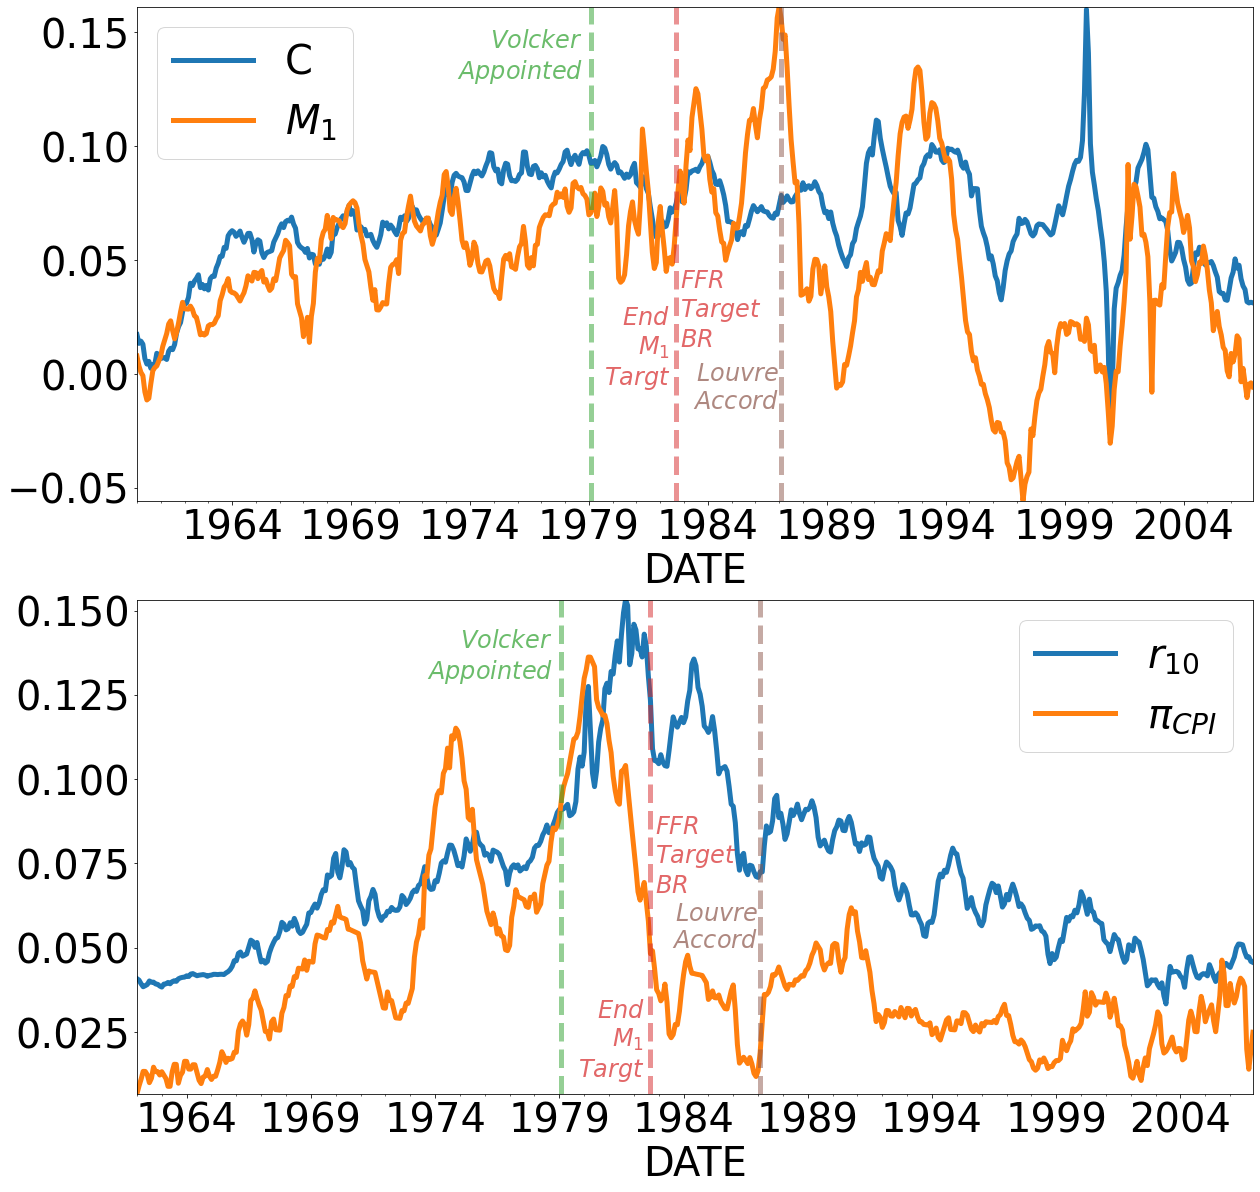

In [13]:
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] =0
plt.rcParams.update({"font.size" : 40})
plot_var_pairs = [["C","$M_1$"],["$r_{10}$","$\pi_{CPI}$"]]
fig, axs = plt.subplots(2,1,figsize=(20,20))
for i in range(len(plot_var_pairs)):
    plot_vars = plot_var_pairs[i]
    plot_data = data["Rates"][plot_vars].loc[:"2006"]
    ax = axs[i]
    plot_data.dropna().plot.line(linewidth = 5, ax = ax)
    ax.axvline("1979-02", linewidth = 5, ls = "--", color = "C2", alpha = .5)
    ax.axvline("1982-09", linewidth = 5, ls = "--", color = "C3", alpha = .5)
    ax.axvline("1987-02", linewidth = 5, ls = "--", color = "C5", alpha = .5)
    ax.legend()
    
ax = axs[0]
ax.text("1978-10", .13, "$Volcker$\n$Appointed$", ha = "right", color = "C2", alpha = .7, fontsize = 24)
ax.text("1982-06", .03, "$End$\n$M_1$\n$Targt$", ha = "right", va = "top",color = "C3", alpha = .7, fontsize = 24)
ax.text("1982-11", .01, "$FFR$\n$Target$ \n$BR$", ha = "left", va = "bottom", color = "C3", alpha = .7, fontsize = 24)
ax.text("1987-01", -.015, "$Louvre$\n$Accord$", ha = "right",  alpha = .7,color = "C5", fontsize = 24)

ax = axs[1]
ax.text("1978-10", .13, "$Volcker$\n$Appointed$", ha = "right", color = "C2", alpha = .7, fontsize = 24)
ax.text("1982-06", .035, "$End$\n$M_1$\n$Targt$", ha = "right", va = "top",color = "C3", alpha = .7, fontsize = 24)
ax.text("1982-11", .065, "$FFR$\n$Target$ \n$BR$", ha = "left", va = "bottom", color = "C3", alpha = .7, fontsize = 24)
ax.text("1987-01", .05, "$Louvre$\n$Accord$", ha = "right",  alpha = .7,color = "C5", fontsize = 24)

#     ax.legend()

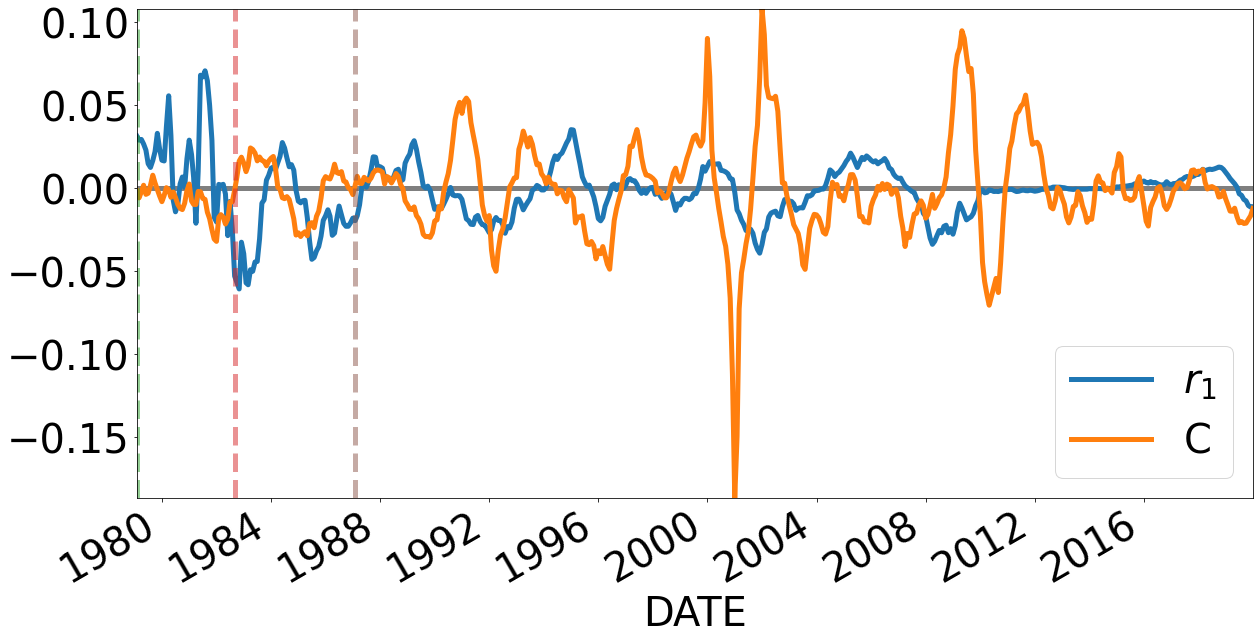

In [14]:
fig, ax = plt.subplots(figsize=(20,10))
plot_vars = ["$r_{1}$", "C"]
ax.axhline(0, linewidth = 5, color = "k", alpha = .5)
plot_data = data["Rates"][plot_vars].diff(diff).loc["1979":"2019"]
plot_data.dropna().plot.line(linewidth = 5, ax = ax)
ax.axvline("1979-02", linewidth = 5, ls = "--", color = "C2", alpha = .5)
ax.axvline("1982-09", linewidth = 5, ls = "--", color = "C3", alpha = .5)
ax.axvline("1987-02", linewidth = 5, ls = "--", color = "C5", alpha = .5)
ax.legend()


### Greenspan Era

Greenspan's tenure can be seen much in the same light. Greenspan entered chairmanship in 1987. He immediately faced a financial crisis - Black Monday - that tested the Volcker operating system over which he assumed leadership. In order to maintain the stability of the LAW framework, Greenspan had to initiate monetary tightening leading into a presidential election in 1992. He succeeded - and, due more to Ross Perot than Greenspan, Bill Clinton won. Greenspan would be reappointed on multiple occasions as he served as chair until February 2006. During his tenure, Greenspan, of course, dealth with a number of other crises. he prominently handled the LTCM crisis, indirectly orchestrating a largely private bailout. He provided tremendous short-term liquidity leading into the year 2000 in responise to fears over Y2K. The liquidity that was self-reversing as the Fed accumulated a significant amount of short-term government bonds. Further, he provided major stimulus after the attacks on 9/11 in order to prevent a financial panic. Some blame this last action on inflation risks that emerged in the middle of the first decade in the 2000s - and we will see next week that the Taylor Rule suggests this interpetation - but we must also recognize that capital inflows into the united states increased significantly at the same time. When we consider Bernanke's monetary policy in a later lesson, we will see that the new, "Unconventional", attempts to mitigate these inflationary risks, at least the way that it was implemented by Bernanke and Yellen.

Text(0.5, 0.98, '$\\Delta$ Year-over-Year')

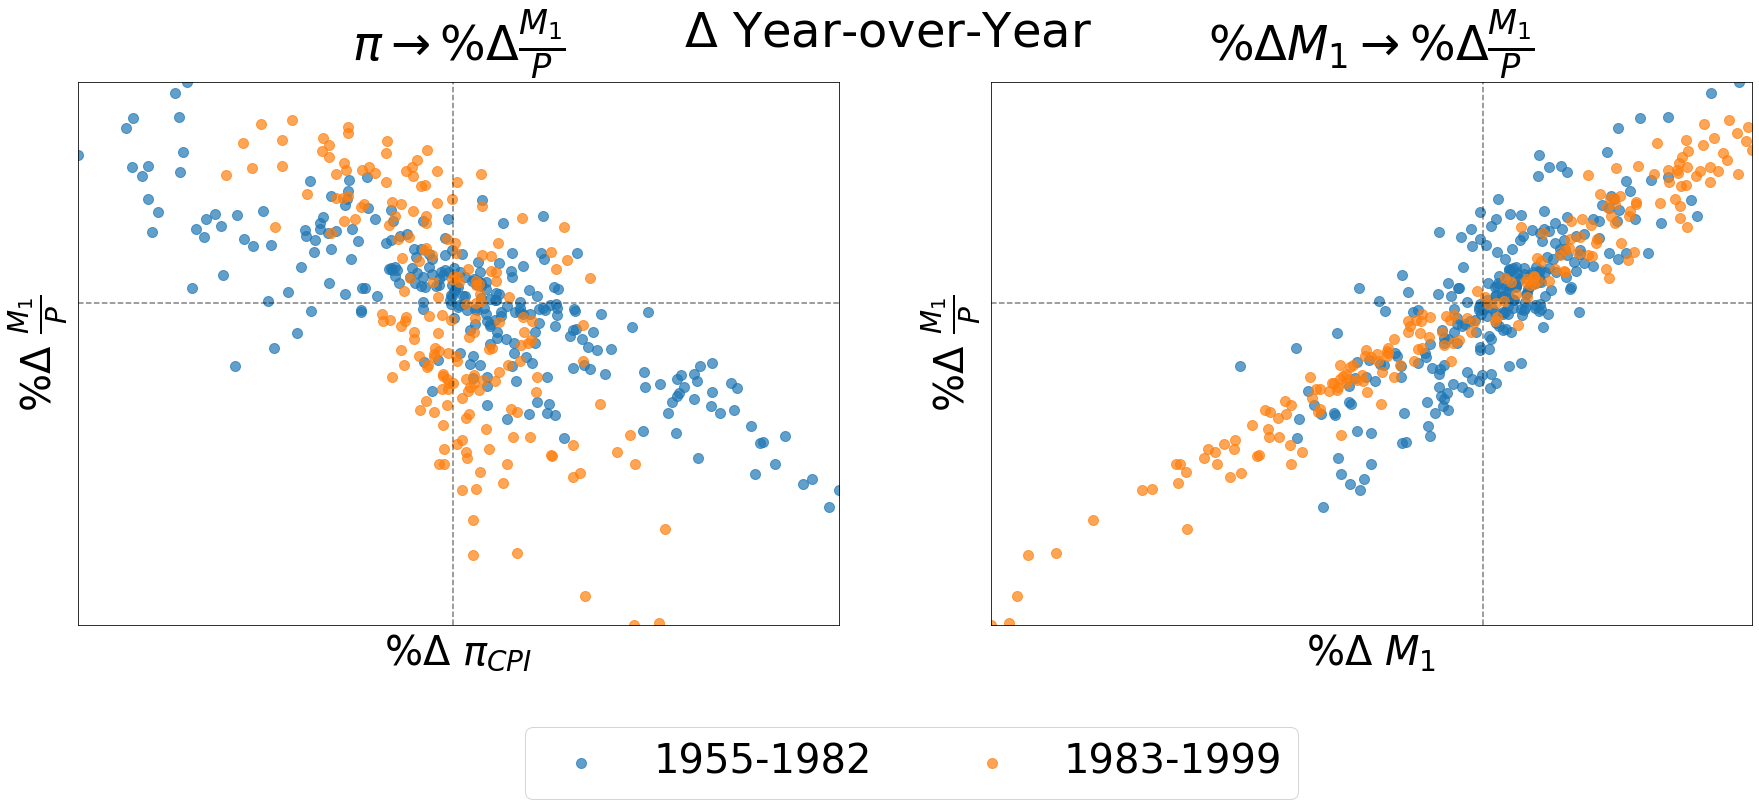

In [15]:
plot_data = data["Rates"][["$M_1$", "$\pi_{CPI}$", "$\\frac{M_1}{P}$"]]
xs = "$\pi_{CPI}$", "$M_1$"
fig, ax = plt.subplots(1,2, figsize=(30,10))
for i in range(len(xs)):
    legend = True if i == 0 else False
    x = xs[i]
    y = "$\\frac{M_1}{P}$"
    start,end = "1955","1982"
    alpha = .7
    plot_data.loc[start:end].diff(diff).dropna().plot.scatter(x = x, 
                                                                  y = y,
                                                                  c = "C0",#"$P_{CPI}$",
                                                                  cmap = "viridis",
                                                                  s = 100,
                                                                  label = start +"-" + end,
                                                                  ax = ax[i],
                                                                  alpha = alpha,
                                                                 legend = legend)

    start,end = "1983","1999"
    plot_data.loc[start:end].diff(diff).dropna().plot.scatter(x = x, 
                                                                  y = y,
                                                                  c = "C1",#"$P_{CPI}$",
                                                                  cmap = "viridis",
                                                                  s = 100,
                                                                  label = start +"-" + end,
                                                                  legend = legend,
                                                                  alpha = alpha,
                                                                  ax = ax[i])
    ax[i].axhline(0, ls = "--", color = "k", alpha = .5)
    ax[i].axvline(0, ls = "--", color = "k", alpha = .5)
    ax[i].set_yticklabels([])
    ax[i].set_xticklabels([])
    ax[i].tick_params('both', length=0, which='both')
    ax[i].set_xlabel("$\%\Delta$ " + x)
    ax[i].set_ylabel("$\%\Delta$ " + y)
    
ax[0].legend(bbox_to_anchor = (1.63,-.15), ncol = 2)
ax[0].set_title("$\pi \\rightarrow \%\Delta \\frac{M_1}{P}$")
ax[1].set_title("$\%\Delta M_1 \\rightarrow \%\Delta \\frac{M_1}{P}$")
plt.suptitle("$\Delta$ Year-over-Year")

Text(0.5, 0.98, '$\\Delta$ Year-over-Year')

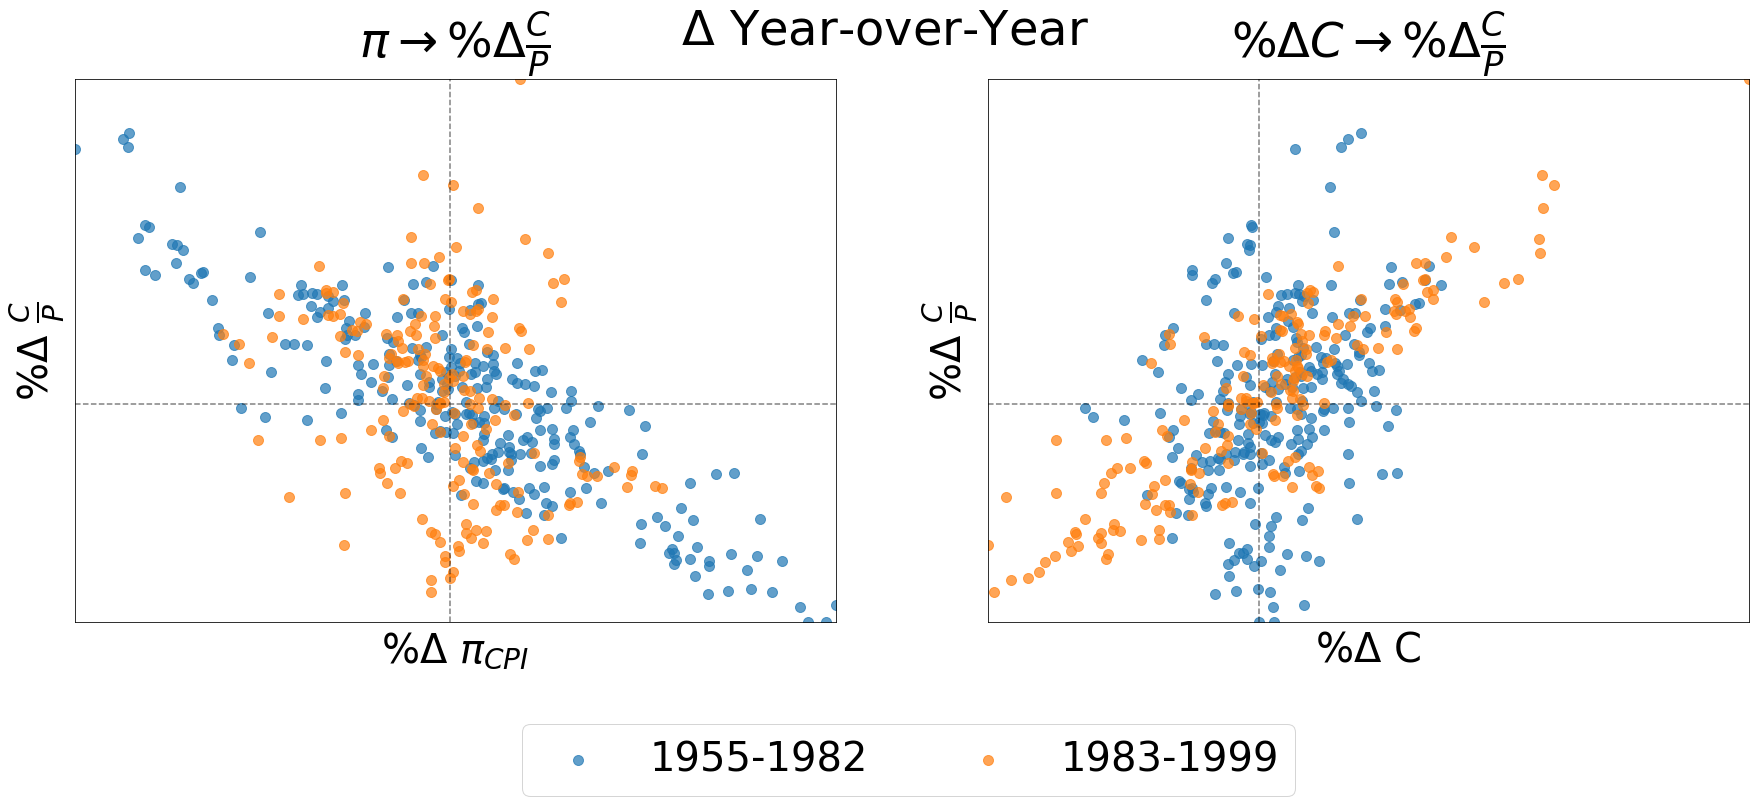

In [16]:
plot_data = data["Rates"][["C", "$\pi_{CPI}$", "$\\frac{C}{P}$"]]
xs = "$\pi_{CPI}$", "C"
fig, ax = plt.subplots(1,2, figsize=(30,10))
for i in range(len(xs)):
    legend = True if i == 0 else False
    x = xs[i]
    y = "$\\frac{C}{P}$"
    start,end = "1955","1982"
    alpha = .7
    plot_data.loc[start:end].diff(diff).dropna().plot.scatter(x = x, 
                                                                  y = y,
                                                                  c = "C0",#"$P_{CPI}$",
                                                                  cmap = "viridis",
                                                                  s = 100,
                                                                  label = start +"-" + end,
                                                                  ax = ax[i],
                                                                  alpha = alpha,
                                                                 legend = legend)

    start,end = "1983","1999"
    plot_data.loc[start:end].diff(diff).dropna().plot.scatter(x = x, 
                                                                  y = y,
                                                                  c = "C1",#"$P_{CPI}$",
                                                                  cmap = "viridis",
                                                                  s = 100,
                                                                  label = start +"-" + end,
                                                                  legend = legend,
                                                                  alpha = alpha,
                                                                  ax = ax[i])
    ax[i].axhline(0, ls = "--", color = "k", alpha = .5)
    ax[i].axvline(0, ls = "--", color = "k", alpha = .5)
    ax[i].set_yticklabels([])
    ax[i].set_xticklabels([])
    ax[i].tick_params('both', length=0, which='both')
    ax[i].set_xlabel("$\%\Delta$ " + x)
    ax[i].set_ylabel("$\%\Delta$ " + y)
    
ax[0].legend(bbox_to_anchor = (1.63,-.15), ncol = 2)
ax[0].set_title("$\pi \\rightarrow \%\Delta \\frac{C}{P}$")
ax[1].set_title("$\%\Delta C \\rightarrow \%\Delta \\frac{C}{P}$")
plt.suptitle("$\Delta$ Year-over-Year")

## Conclusion

By leaning against the wind, Volcker and Greenspan turned monetary policy into a stabilizing force. Inflation expecatations are typically concomitant with expansion of aggregate expenditures in the economy. That is, so long as monetary policy promotes low and stable inflation, the price level and real income tend to move together across the business cycle. And as long as investors expect that the monetary policies is structured to stabilize and limit inflation, monetary expansion will not immediately result in inflation as the quantity theory would suggest. Easing that occurs during disinflationary or deflationary periods push against this downward pressure. Tightening that occurs during economic expansion limits inflationary pressures. This may seem obvious in hindsight, but at the time that these policies were first implemented, this logic was revolutionary. 

Despite the immediate success in stabilizing and lowering inflation, interest rates took more than a decade to enter the range that would characterize the rest of the era that employed the LAW framework. With inflation once again making the headlines, it is critical that we recognize that the low interest rates that we have observed over the past few decades is the inheritnce of much hard work and political risk. If we take this foregranted, we risk losing this stability. Thankfully, the FOMC appears to be heeding this message. 

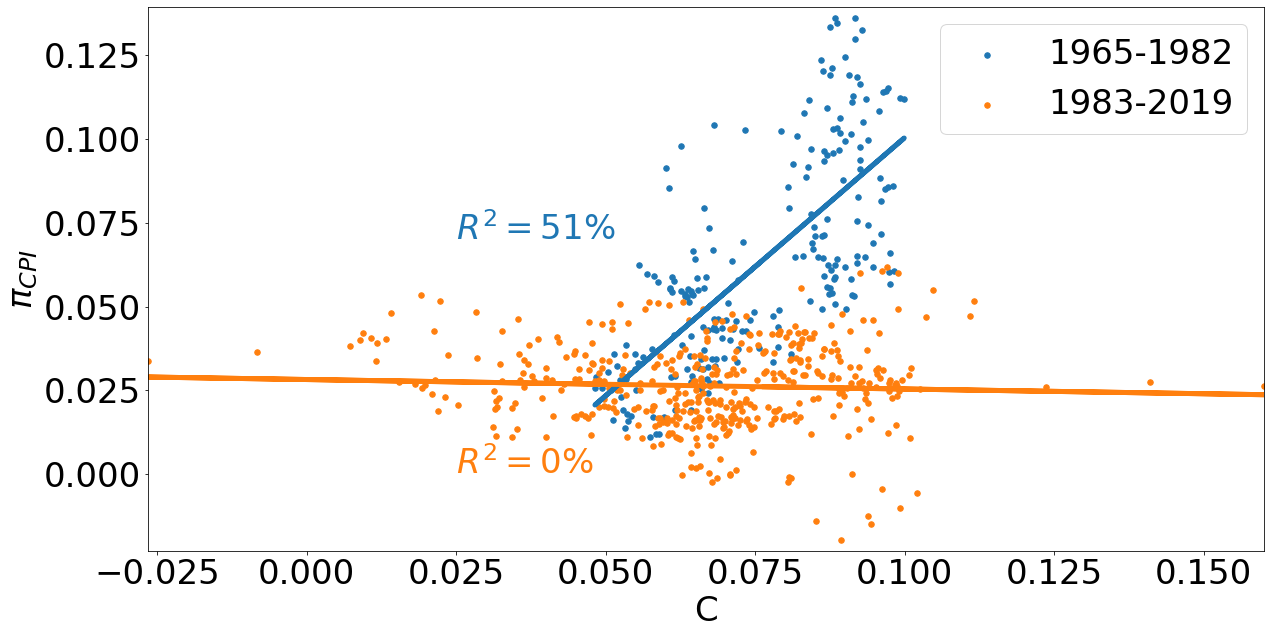

In [17]:
import statsmodels.api as sm
plt.rcParams['axes.ymargin'] = 0.02
plt.rcParams['axes.xmargin'] = 0.00

plt.rcParams.update({'font.size': 34})
fig,ax = plt.subplots(figsize=(20,10))

dates = [1964, 1982, 2019]#, "2022"]
plot_vars = ["$\pi_{CPI}$", "C"]
plot_df = data["Rates"][plot_vars]
for i in range(len(dates) - 1):
    start = str(dates[i] +1)
    end = str(dates[i + 1])
    plot_df.loc[start:end].plot.scatter(x = plot_vars[1], y = plot_vars[0],
                                  ax = ax, color = "C" + str(i), alpha = 1, 
                                                       label = start + "-" + end, s = 30)
for i in range(len(dates) - 1):
    start = str(dates[i] +1)
    end = str(dates[i + 1])
    
    y = plot_df[[plot_vars[0]]].loc[start:end]
    X = plot_df[[plot_vars[1]]].loc[start:end]
    X["Constant"] = 1
    reg = sm.OLS(y, X)
    results = reg.fit()
    # plot_df["Trend"] = 
    X_new = plot_df[[plot_vars[1]]].loc[start:end]

    X_new["Intercept"] = 1
    X_new["Trend"] = results.predict(X_new)
    # = results.fittedvalues
    ax.plot(X_new[plot_vars[1]], X_new["Trend"], linewidth = 5, 
                        color = "C" + str(i))
    ax.text(.025  ,  .07 * (1 - i)  , "$R^2=$" + str(int(round(results.rsquared*100,0))) + "%", color = "C" + str(i))
# ax.set_xticklabels([str(x) + "%" for x in ax.get_xticks()])
# ax.set_yticklabels([str(round(y,2)) + "%" for y in ax.get_yticks()])

# ax.tick_params('both', length=0, which='both')
# ax.set_title("Year-over-Year Change")

# plt.legend(fontsize = 30)

# plt.show()
# df.keys()


Text(0, 0.5, '$\\pi_{CPI}$')

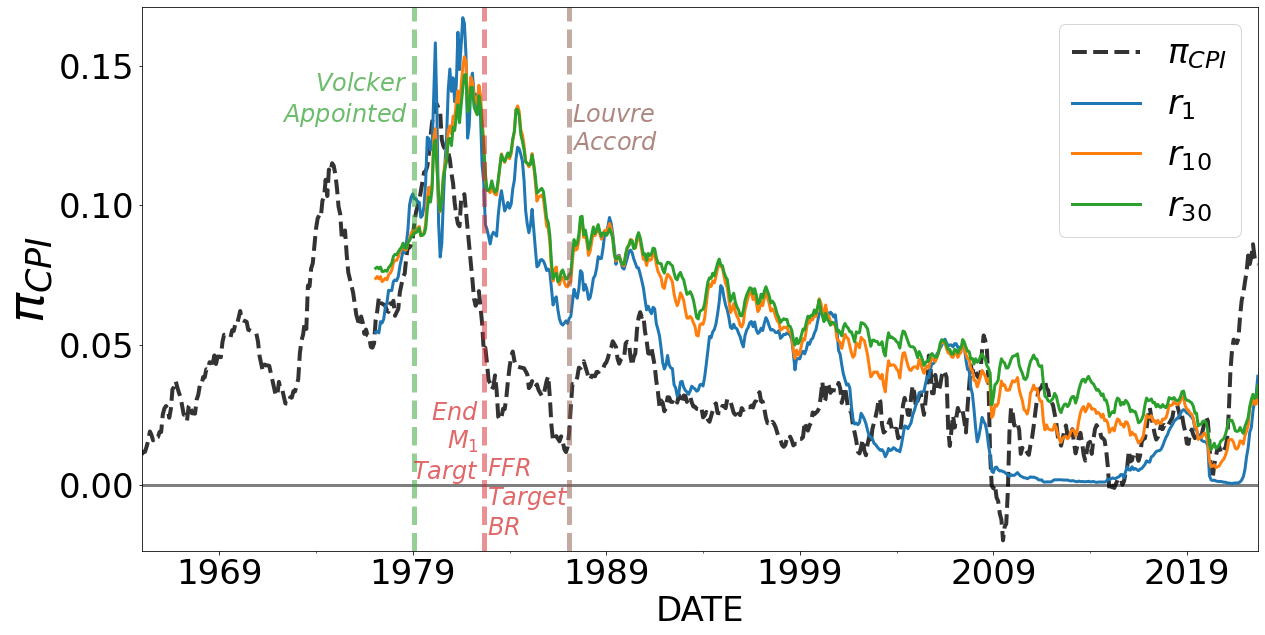

In [18]:
fig,ax = plt.subplots(figsize=(20,10))
plot_vars = ["$r_{1}$","$r_{10}$", "$r_{30}$", "$\pi_{CPI}$"]
data["Rates"][plot_vars[-1]].loc["1965":].dropna().plot.line(linewidth = 4, ls = "--",
                                                             color = "k", alpha = .8, 
                                                             ax = ax)

ax.axhline(0, linewidth = 3, ls = "-", color = "k", alpha = .5)
data["Rates"][plot_vars[:-1]].dropna().plot.line(linewidth = 3,legend = False, ax = ax)
ax.legend()
ax.axvline("1979-02", linewidth = 5, ls = "--", color = "C2", alpha = .5)
ax.axvline("1982-09", linewidth = 5, ls = "--", color = "C3", alpha = .5)
ax.axvline("1987-02", linewidth = 5, ls = "--", color = "C5", alpha = .5)
ax.text("1978-10", .13, "$Volcker$\n$Appointed$", ha = "right", color = "C2", alpha = .7, fontsize = 24)
ax.text("1982-06", .03, "$End$\n$M_1$\n$Targt$", ha = "right", va = "top",color = "C3", alpha = .7, fontsize = 24)
ax.text("1982-11", .01, "$FFR$\n$Target$ \n$BR$", ha = "left", va = "top", color = "C3", alpha = .7, fontsize = 24)
ax.text("1987-04", .12, "$Louvre$\n$Accord$", alpha = .7,color = "C5", fontsize = 24)
ax.set_ylabel("$\\pi_{CPI}$", fontsize = 50)